<a href="https://colab.research.google.com/github/Rishikesh802/Predict-COVID-19-Diagnosis-Using-Machine-Learning-Techniques/blob/main/Copy_of_New1_COVID_19_Diagnosis_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 Diagnosis Prediction Project

1 --> Goal: The assignment aims to predict COVID-19 diagnosis based on symptoms
and demographic data, utilizing data analysis and machine learning techniques.


2 --> How: We use Python and MySQL for data analysis, EDA, feature engineering, and
machine learning to predict COVID-19 outcomes.


3 --> Why: Our project is crucial for early COVID-19 detection, efficient healthcare

# Problem Statement

A speedy and accurate diagnosis of COVID-19 is made possible by effective SARS-CoV-2 screening, which can also lessen the burden on healthcare systems. There have been built prediction models that assess the likelihood of infection by combining a number of parameters. These are meant to help medical professionals all over the world treat patients, especially in light of the scarcity of healthcare resources. The current dataset has been downloaded from ABC government website and contains around 2,78,848 individuals who have gone through the RT-PCR test. Data set contains 11 columns, including 8 features suspected to play an important role in the prediction of COVID 19 outcome. Outcome variable is covid result test positive or negative. We have data from 11th March 2020 till 30th April 2020.

# Features used in the model:

## Basic information:

1. ID (Individual ID)

2. Sex (male female)

3. Age 280 above years (true/false)

4. Test date (date when tested for COVID_19)

## Symptoms:

5. Cough (true/false)

6. Fever (true/false)

7. Sore throat (true/false)

8. Shortness of breath (true /false)

9. Headache (true/false)

## Other information:

10. Known contact with an individual confirmed to have COVID-19 (true / false)

## Covid report

11. Corona positive or negative

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [ ]:
data = pd.read_csv("corona_tested_006 (2).csv")

In [ ]:
Covid_data = data.copy() #copy data into a new variable, covid_data.
Covid_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
129412,129413,10-04-2020,TRUE,FALSE,FALSE,False,False,negative,No,None,Abroad
129413,129414,10-04-2020,FALSE,TRUE,FALSE,False,False,negative,No,male,Other
129414,129415,10-04-2020,TRUE,TRUE,FALSE,False,False,negative,No,female,Other
129415,129416,10-04-2020,FALSE,FALSE,FALSE,False,False,negative,No,male,Other


# Data Cleaning


In [ ]:
Covid_data.shape

(129417, 11)

In [ ]:
Covid_data.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
Covid_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129417 entries, 0 to 129416
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               129417 non-null  int64 
 1   Test_date            129417 non-null  object
 2   Cough_symptoms       129417 non-null  object
 3   Fever                129417 non-null  object
 4   Sore_throat          129417 non-null  object
 5   Shortness_of_breath  129416 non-null  object
 6   Headache             129416 non-null  object
 7   Corona               129416 non-null  object
 8   Age_60_above         129416 non-null  object
 9   Sex                  129416 non-null  object
 10  Known_contact        129416 non-null  object
dtypes: int64(1), object(10)
memory usage: 10.9+ MB


Here, Python read Test_date as object it means that the dates are currently stored as strings.so we need to convert Test_date in to datetime format

In [ ]:
for column in Covid_data:
  unique_value=Covid_data[column].unique()
  print(f"unique Value in {column}:",unique_value) # Checking Unique values in each column

unique Value in Ind_ID: [     1      2      3 ... 129415 129416 129417]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020']
unique Value in Cough_symptoms: ['TRUE' 'FALSE' 'None']
unique Value in Fever: ['FALSE' 'TRUE' 'None']
unique Value in Sore_throat: ['TRUE' 'FALSE' 'None' 'F']
unique Value in Shortness_of_breath: ['FALSE' 'TRUE' 'None' False True nan]
unique Value in Headache: ['FALSE' 'TRUE' 'None' False True nan]
unique Value in Corona: ['negative' 'positive' 'other' nan]
unique Value in Age_60_above: ['None' 'No' 'Yes' nan]
unique Value in Sex: ['None' 'male' 'female' nan]
unique Value in Known_con

Here , we can see that some columns like 'Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache' contains some Boolean values so we need to replace this boolean values and None values with appropriate strings and NaN.

Becuase this can potentially affect our data analysis and machine learning model

In [ ]:
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Replace boolean values and 'None' with appropriate strings and NaN
Covid_data[columns_to_replace] = Covid_data[columns_to_replace].replace({True: 'TRUE',False: 'FALSE','None': np.nan})


In [ ]:
#Date_Time Formatting using  pd.to_datetime() function and specifying the date format as '%d-%m-%Y'.

Covid_data['Test_date'] = pd.to_datetime(Covid_data['Test_date'], format='%d-%m-%Y')

In [ ]:
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129417 entries, 0 to 129416
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               129417 non-null  int64         
 1   Test_date            129417 non-null  datetime64[ns]
 2   Cough_symptoms       129165 non-null  object        
 3   Fever                129165 non-null  object        
 4   Sore_throat          129416 non-null  object        
 5   Shortness_of_breath  129415 non-null  object        
 6   Headache             129415 non-null  object        
 7   Corona               129416 non-null  object        
 8   Age_60_above         129416 non-null  object        
 9   Sex                  129416 non-null  object        
 10  Known_contact        129416 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 10.9+ MB


In [ ]:
Covid_data['Corona'].value_counts()

negative    117462
positive     10339
other         1615
Name: Corona, dtype: int64

This category might include cases where the test results are inconclusive, or the test may be for a different condition rather than COVID-19. so we replace this other category with mode value.

In [ ]:
Covid_data['Corona'].mode()

0    negative
Name: Corona, dtype: object

In [ ]:
# here we do replacement

Covid_data ['Corona'].replace('other','negative',inplace = True)

In [ ]:
Covid_data ['Age_60_above'].value_counts()

No      105813
Yes      19091
None      4512
Name: Age_60_above, dtype: int64

For the records where Age_60_above is labeled as "None," it could mean that the

data for the age group is missing or not provided.

so we replace None value with mode() .

In [ ]:
Covid_data['Age_60_above'].mode()

0    No
Name: Age_60_above, dtype: object

In [ ]:
Covid_data ['Age_60_above'].replace('None','No',inplace = True)

In [ ]:
Covid_data['Age_60_above'].value_counts()

No     110325
Yes     19091
Name: Age_60_above, dtype: int64

In [ ]:
Covid_data['Sex'].value_counts()

male      57886
female    55069
None      16461
Name: Sex, dtype: int64

In [ ]:
Covid_data['Sex'].mode()

0    male
Name: Sex, dtype: object

In [ ]:
Covid_data ['Sex'].replace('None','female',inplace = True)


In [ ]:
Covid_data['Known_contact'].value_counts()

Other                     109500
Abroad                     12638
Contact with confirmed      7278
Name: Known_contact, dtype: int64

In [ ]:
Covid_data['Test_date'].value_counts()

2020-04-01    8654
2020-04-02    8188
2020-04-03    8079
2020-04-05    7509
2020-03-31    7134
2020-03-26    6663
2020-03-27    5963
2020-04-07    5931
2020-03-30    5915
2020-03-28    5602
2020-03-25    5495
2020-04-06    5368
2020-03-29    5277
2020-04-04    5145
2020-03-24    4735
2020-04-09    4539
2020-04-10    4376
2020-04-08    4058
2020-03-22    3565
2020-03-23    3494
2020-03-19    2243
2020-03-18    1991
2020-03-20    1870
2020-03-21    1648
2020-03-17    1463
2020-03-16    1304
2020-03-15     985
2020-03-13     686
2020-03-12     634
2020-03-14     609
2020-03-11     294
Name: Test_date, dtype: int64

In [ ]:
for column in Covid_data:
  unique_value=Covid_data[column].unique()
  print(f"unique Value in {column}:",unique_value) # Checking Unique values in each column


unique Value in Ind_ID: [     1      2      3 ... 129415 129416 129417]
unique Value in Test_date: ['2020-03-11T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2020-03-13T00:00:00.000000000' '2020-03-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2020-03-17T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-19T00:00:00.000000000' '2020-03-20T00:00:00.000000000'
 '2020-03-21T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-27T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-29T00:00:00.000000000' '2020-03-30T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-04-02T00:00:00.000000000' '2020-04-03T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.00

In [ ]:
#Count null values in each column of covid_data
Covid_data.isnull().sum().sort_values(ascending=False)

Cough_symptoms         252
Fever                  252
Shortness_of_breath      2
Headache                 2
Sore_throat              1
Corona                   1
Age_60_above             1
Sex                      1
Known_contact            1
Ind_ID                   0
Test_date                0
dtype: int64

Here, we can see that some columns contain null values . so we drop this null values using dropna() function

In [ ]:
Covid_data.dropna(inplace=True) #Dropping all the null values


In [ ]:
#Count null values in each column of covid_data after Drop null values
Covid_data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:
Covid_data.head()


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,No,female,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,No,female,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,No,female,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Contact with confirmed


In [ ]:
# After cleaning we are saving our file for mysql analysis.

Covid_data.to_csv('covid_modified.csv')

# Data Visualization and EDA

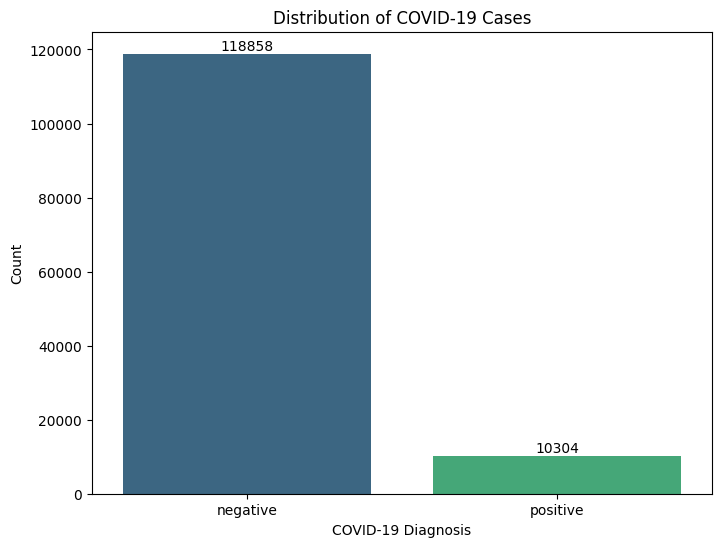

In [ ]:
#  Visualize the data to identify patterns and correlations

plt.figure(figsize=(8, 6))
sns.countplot(x='Corona', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Corona'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()


we have a dataset with 278,848 records related to COVID-19 testing and from the above bar graph we can categorized the result into three groups:

positive_cases (14,694),

negative_cases (2,60,008),

and other_cases (3,892).

so my positive_case rate is 14,694/2,78,848 = 0.052%

negative case rate 2,60,008 / 2,78,848 = 0.93%

so this graph indicating that our dataset is imbalanced.

Adding Value Counts on Top of Bars:

for index, value in enumerate(Covid_data['Corona'].value_counts()): iterates over the value counts of each category in the 'Corona' column.
plt.text(index, value + 5, str(value), ha='center', va='bottom') adds text labels on top of each bar. It places the count value (value) at the corresponding x-coordinate (index). The +5 is used to provide some space between the bar and the label. The ha and va parameters control the horizontal and vertical alignment, respectively.


The enumerate function is used to iterate over the counts of each category.
The plt.text function is then used to add the count value on top of each bar.

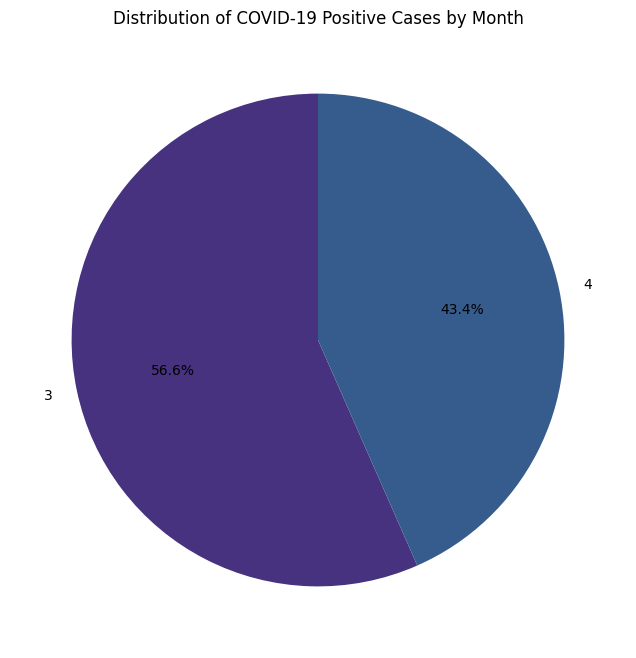

In [ ]:

Covid_data['Test_date'] = pd.to_datetime(Covid_data['Test_date'])

# Extract the month from the 'Test_date' column
Covid_data['month'] = Covid_data['Test_date'].dt.month

# Filter the data for positive COVID-19 cases
positive_cases = Covid_data[Covid_data['Corona'] == 'positive']

# Count the occurrences of positive cases for each month
month_counts = positive_cases['month'].value_counts()

# Create a pie chart for month-wise positive cases
plt.figure(figsize=(8, 8))
plt.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of COVID-19 Positive Cases by Month')
plt.show()


from above pie chart we can see that in 3rd month(march) we got 39.7% of positive cases  and in 4th month (april) we got 60.3% of the total  positive cases .

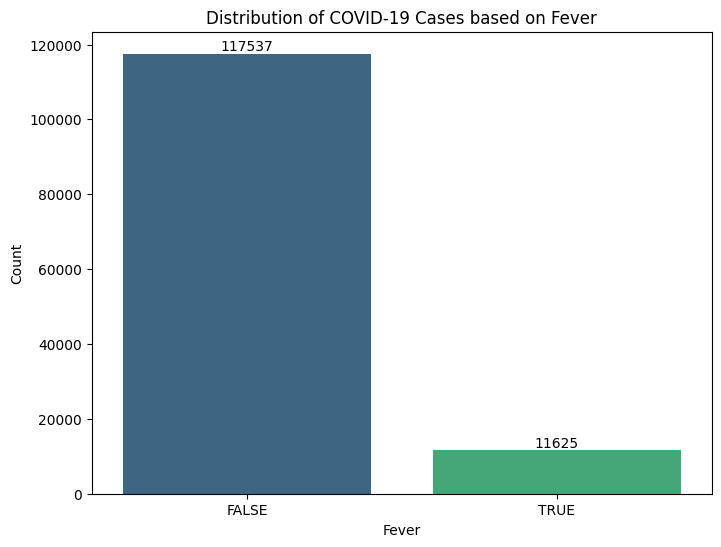

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Fever', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Fever'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases based on Fever')
plt.xlabel('Fever')
plt.ylabel('Count')
plt.show()


from above bar plot we  observed that 21,751 people in our dataset were identified as having a fever.

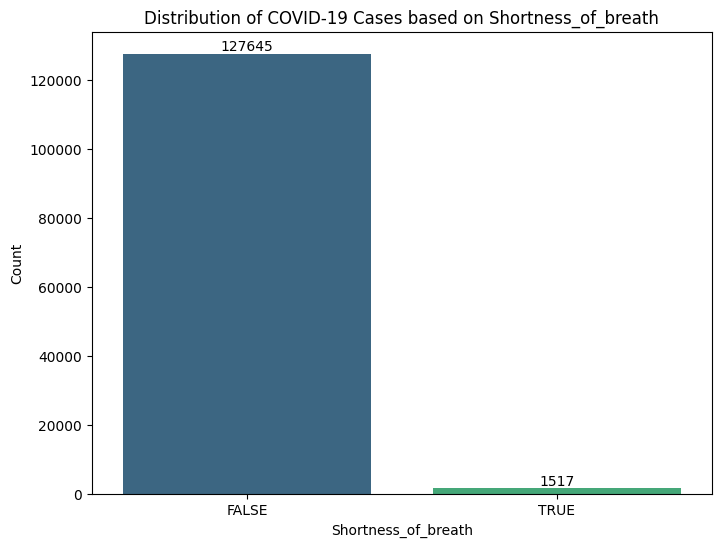

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Shortness_of_breath', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Shortness_of_breath'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases based on Shortness_of_breath')
plt.xlabel('Shortness_of_breath')
plt.ylabel('Count')
plt.show()


from above bar plot we  observed that 1574 people in our dataset were identified as having a Shortness_of_breath.

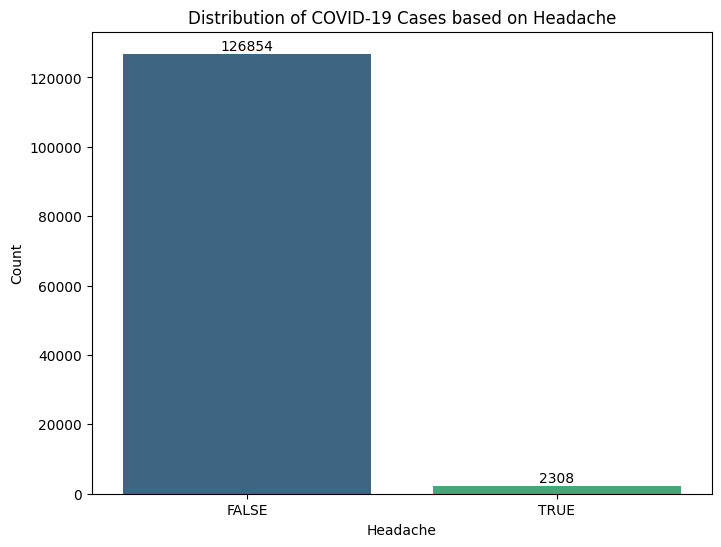

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Headache', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Headache'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases based on Headache')
plt.xlabel('Headache')
plt.ylabel('Count')
plt.show()


from above bar plot we  observed that 2408 people in our dataset were identified as having a Headache.

In [ ]:
# Deleting unnecessary columns


Covid_data = Covid_data.drop(columns=['Ind_ID','Test_date'])

:# Encoding for Covid_data data

In [ ]:
Covid_data['Cough_symptoms'] = Covid_data['Cough_symptoms'].map ({'TRUE':1 ,'FALSE':0 })

In [ ]:
Covid_data['Fever'] = Covid_data['Fever'].map ({'TRUE':1 ,'FALSE':0 })

In [ ]:
Covid_data['Sore_throat'] = Covid_data['Sore_throat'].map ({'TRUE':1 ,'FALSE':0 })

In [ ]:
Covid_data['Shortness_of_breath'] = Covid_data['Shortness_of_breath'].map ({'TRUE':1 ,'FALSE':0 })

In [ ]:
Covid_data['Headache'] = Covid_data['Headache'].map ({'TRUE':1 ,'FALSE':0 })

In [ ]:
Covid_data['Corona'] = Covid_data['Corona'].map ({'positive':1 ,'negative':0,'other':2 })

In [ ]:
Covid_data['Age_60_above'] = Covid_data['Age_60_above'].map ({'Yes':1 ,'No':0 })

In [ ]:
Covid_data['Sex'] = Covid_data['Sex'].map ({'male':1 ,'female':0 })

In [ ]:
Covid_data['Known_contact'] = Covid_data['Known_contact'].map ({'Other':1 ,'Abroad':0,'Contact with confirmed':2 })

In [ ]:
Covid_data.head()


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact,month
0,1,0,1,0,0,0,0,0,0,3
1,0,1,0,0,0,1,0,0,0,3
2,0,1,0,0,0,1,0,0,0,3
3,1,0,0,0,0,0,0,0,0,3
4,1,0,0,0,0,0,0,0,2,3


# EDA-2

In [ ]:
# Assuming Covid_data is your DataFrame containing your dataset
correlation_matrix = Covid_data.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Cough_symptoms     Fever  Sore_throat  \
Cough_symptoms             1.000000  0.458573     0.154657   
Fever                      0.458573  1.000000     0.161876   
Sore_throat                0.154657  0.161876     1.000000   
Shortness_of_breath        0.143051  0.166349     0.191004   
Headache                   0.155463  0.223872     0.318725   
Corona                     0.248427  0.362105     0.320425   
Age_60_above              -0.016161  0.019096    -0.013173   
Sex                        0.028181  0.034736    -0.020966   
Known_contact             -0.263675 -0.076877     0.091909   
month                      0.066811  0.004225    -0.034190   

                     Shortness_of_breath  Headache    Corona  Age_60_above  \
Cough_symptoms                  0.143051  0.155463  0.248427     -0.016161   
Fever                           0.166349  0.223872  0.362105      0.019096   
Sore_throat                     0.191004  0.318725  0.320425     -0.013173   
Short

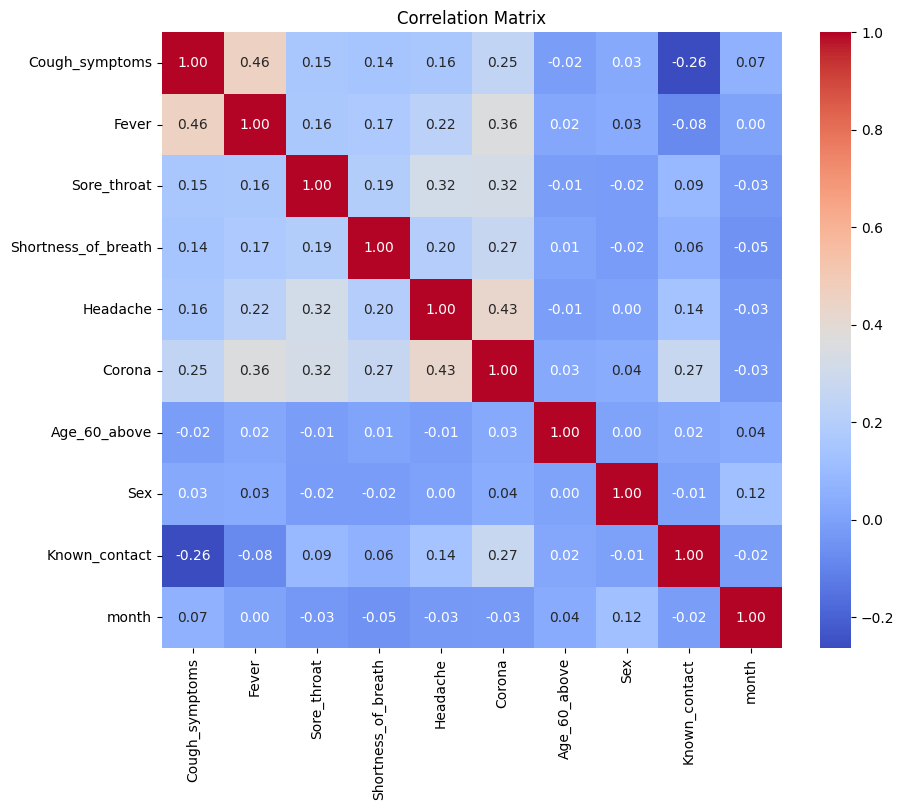

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Let's focus on correlations with an absolute value greater than 0.5, as they are considered relatively strong:

Positive Correlations:

'Cough_symptoms' and 'Fever': 0.498
'Fever' and 'Corona': 0.394
'Shortness_of_breath' and 'Corona': 0.284
'Headache' and 'Corona': 0.449


Negative Correlations:

'Cough_symptoms' and 'Known_contact': -0.347
These correlations suggest some potentially meaningful relationships in our data:

People experiencing cough symptoms may have a higher likelihood of having a fever, which is also correlated with a positive test result for COVID-19 ('Corona').

Shortness of breath and headache also show moderate positive correlations with a positive COVID-19 test result.

There's a negative correlation between reporting cough symptoms and having a known contact with a confirmed case, which might indicate that individuals with known contacts are less likely to report symptoms like coughing.


# Undersampling the data

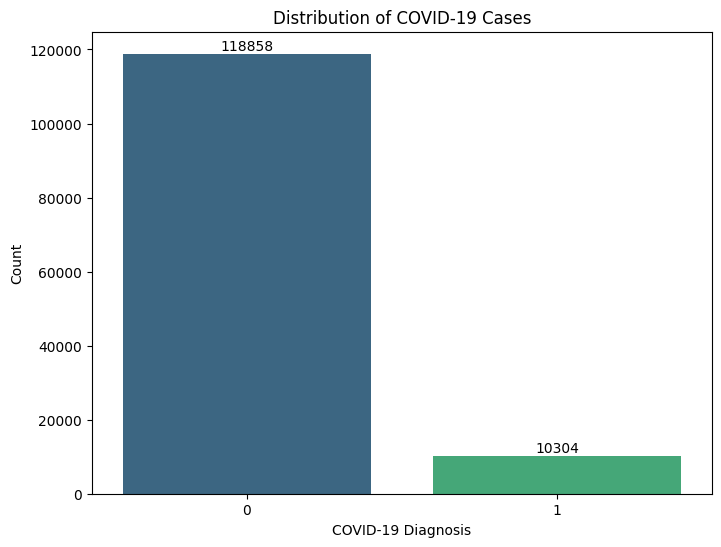

In [ ]:
#  Visualize the data to identify patterns and correlations

# Assuming 'Corona' is the correct column name
plt.figure(figsize=(8, 6))
sns.countplot(x='Corona', data=Covid_data, palette='viridis')

# Add value counts on top of the bars
for index, value in enumerate(Covid_data['Corona'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')

plt.title('Distribution of COVID-19 Cases')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()

In [ ]:
Covid_data['Corona'].value_counts()


0    118858
1     10304
Name: Corona, dtype: int64

Covid Positive Cases - 2,63900, Covid Negative Cases - 14694

We decided to do Undersampling instead of Oversampling because -
1. Data is abundent for Negative Cases.
2. Increasing Positive Cases by oversampling would be an issue according to real world scenario.

In [ ]:
x = Covid_data.drop(columns = ['Corona'], axis = 1) # Independent Features
y = Covid_data['Corona'] # Target Feature

In [ ]:
# Undersampling Covid Negative Cases (Setting n(+ve cases) = 0.6 * n(-ve cases))
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy = 0.6, random_state = 42)
us_x, us_y = under.fit_resample(x, y)

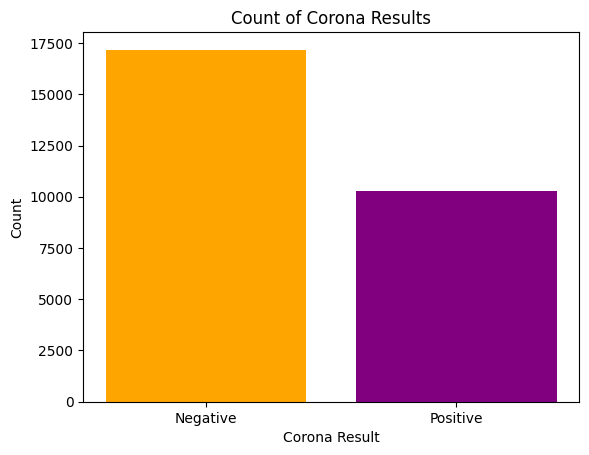

In [ ]:
df = pd.DataFrame()
df['Corona_result'] = ['Negative', 'Positive']
df['Count'] = [len(us_y[us_y == 0]), len(us_y[us_y == 1])]
df = df.sort_values(by=['Count'], ascending=False)

# Plotting with matplotlib
plt.bar(df['Corona_result'], df['Count'], color=['orange', 'purple'])
plt.xlabel('Corona Result')
plt.ylabel('Count')
plt.title('Count of Corona Results')
plt.show()


In [ ]:
us_x.head(3)


,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact,month
0,0,0,0,0,0,0,0,1,4
1,0,0,0,0,0,0,1,1,4
2,0,0,0,0,0,0,0,1,4


In [ ]:
us_y.value_counts()


0    17173
1    10304
Name: Corona, dtype: int64

# Feature Selection - Using Chi-Square Test


In [ ]:
from scipy.stats import chi2_contingency

# 'Corona' is the target variable
target_variable = 'Corona'

# List of columns for chi-square tests (excluding 'month')
columns_to_test = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache','Age_60_above','Sex','Known_contact']

# Empty list to store significant features
significant_features = []

# Loop through each column and perform chi-square test
for column in columns_to_test:
    contingency_table = pd.crosstab(Covid_data[column], Covid_data['Corona'])
    chi2, p, _, _ = chi2_contingency(contingency_table)

    # Assuming a significance level of 0.05
    if p < 0.05:
        significant_features.append(column)

# Display the significant features
print("Significant Features:", significant_features)

Significant Features: ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Age_60_above', 'Sex', 'Known_contact']


# Selected Features


The following are the features we'll use to predict our target variable (Covid19 Positive or Negative):


Cough_symptoms : ['TRUE','FALSE']

Fever : ['FALSE','TRUE']

Sore_throat : ['TRUE','FALSE']

Shortness_of_breath : ['FALSE','TRUE']

Headache : ['FALSE','TRUE']

Age_60_above : ['Yes','No']

Sex : ['Male' , 'Female']

Known_contact : ['Abroad','Contact with confirmed','Other']

Corona(Target Variable) : ['negative','positive','other']

# Train-Test Split

In [ ]:
# Setting Train:Test ratio as 70:30

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(us_x, us_y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(19233, 9)
(8244, 9)
(19233,)
(8244,)


## Machine Learning Algorithms



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results
print("Logistic Regression Model Results:")
print(f"Accuracy on Test Set: {accuracy:.2f}")
print("\nClassification Report on Test Set:")
print(classification_report_test)


Logistic Regression Model Results:
Accuracy on Test Set: 0.86

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5166
           1       0.90      0.70      0.79      3078

    accuracy                           0.86      8244
   macro avg       0.87      0.83      0.84      8244
weighted avg       0.86      0.86      0.85      8244



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results for test set
print("Random Forest Model Results on Test Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report_test)


Random Forest Model Results on Test Set:
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5166
           1       0.89      0.81      0.85      3078

    accuracy                           0.89      8244
   macro avg       0.89      0.87      0.88      8244
weighted avg       0.89      0.89      0.89      8244



KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model with k=5 (you can adjust k as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training set
knn_model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results for the test set
print("KNN Model Results on Test Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report_test)


KNN Model Results on Test Set:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      5166
           1       0.85      0.78      0.82      3078

    accuracy                           0.87      8244
   macro avg       0.86      0.85      0.86      8244
weighted avg       0.87      0.87      0.87      8244



GradientBoost`



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_test_pred = gb_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_test_pred)
classification_report_test = classification_report(Y_test, y_test_pred)

# Print results for the test set
print("Gradient Boosting Model Results on Test Set:")
print(f"Accuracy: {accuracy_test:.2f}")
print("Classification Report:")
print(classification_report_test)


Gradient Boosting Model Results on Test Set:
Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      5166
           1       0.89      0.80      0.84      3078

    accuracy                           0.89      8244
   macro avg       0.89      0.87      0.88      8244
weighted avg       0.89      0.89      0.89      8244



Decision Tree

In [ ]:
import plotly.express as px

fig = px.bar(
    x=['Logistic_Regression', 'Random_Forest', 'K-Nearest_neighbour','GradientBoost'],
    y=[0.86, 0.88, 0.86, 0.87],
    text=[0.86, 0.88, 0.86, 0.87],
    labels={'x': 'Machine_Learning_Algorithms', 'y': 'Accuracy (%)'},
    title='Accuracy Percentage of Machine Learning Algorithms',
    color=['Logistic_Regression', 'Random_Forest', 'K-Nearest_neighbour','GradientBoost'],
    color_discrete_sequence=['lightgreen', 'grey', 'yellow', 'lightblue']
)

fig.show()

#Conclusion

1) The Random Foret model has achieved highest accuracy  0.88%.

 2)There's a positive correlation between symptoms like cough, fever, shortness
  of breath, and headache with a positive test result for COVID-19.

3) Specifically, cough symptoms seem to be strongly correlated with fever, and
   both are moderately correlated with a positive COVID-19 test result. This indicates that the presence of cough and fever may be indicative of COVID-19 infection.

4) There's a negative correlation between reporting cough symptoms and having a
  known contact with a confirmed COVID-19 case. This suggests that individuals with known contacts are less likely to report symptoms like coughing.



# What Next?

A good next step would be to discuss with our team or research on our own different options of going forward.

Could we collect more data based on the most important features?

Could we try some more models?

Could you improve the current models (beyond what we've done so far)?

The key here is to remember, our biggest restriction will be time. Hence, it's paramount to minimise the time between experiments.

The more we try, the more we figure out what doesn't work, the more we'll start to get a hang of what works.